In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


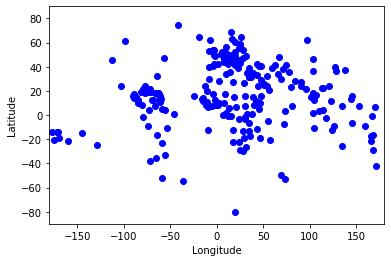

In [3]:
X = data[["Longitude", "Latitude"]]
# Visualize data point
plt.scatter(X["Longitude"], X["Latitude"], c="blue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

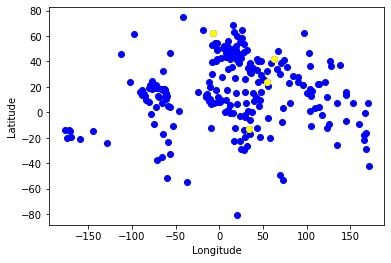

In [4]:
k=4
# select random observation as a centriod 
centroids = (X.sample(n=k))
plt.scatter(X["Longitude"], X["Latitude"], c="blue")
plt.scatter(centroids["Longitude"], centroids["Latitude"], c="yellow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [5]:
centroids

,Longitude,Latitude
7,54.300167,23.905282
73,-6.880954,62.053854
227,63.140015,41.755542
152,34.289356,-13.218081


In [6]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Longitude"]-row_d["Longitude"])**2
            d2 = (row_c["Latitude"]-row_d["Latitude"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    centroids_new = X.groupby(["Cluster"]).mean()[["Latitude", "Longitude"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (centroids_new['Latitude'] - centroids['Latitude']).sum() + (centroids_new['Longitude'] - centroids['Longitude']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["Latitude","Longitude"]]

<ipython-input-6-97fcc9771fb1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED


-7.5886160074548865
-41.54718464965671
-11.65204850701677
-2.7323858358745285
-0.7054331210693512
0.9024818262966123
0.0


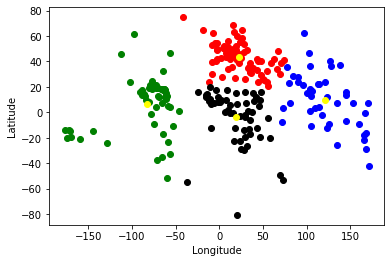

In [8]:
k=4
color=['red','green','blue','black']
for g in range(k):
    data=X[X["Cluster"]==g+1]
    plt.scatter(data["Longitude"],data["Latitude"],c=color[g])
plt.scatter(centroids["Longitude"],centroids["Latitude"],c='yellow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()